In [91]:
import pandas as pd
import numpy as np
import spacy

from collections import Counter, defaultdict
from html import unescape

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import catboost as ctb
import lightgbm as lgb

from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

import helper as h
%matplotlib inline

In [92]:
df = pd.read_csv('recovery_dataset.csv')

In [93]:
df.sample(10)

,target,text,text_norm,text_norm_counter,counter_tokens
40,true,Nikon just announced a delay of its D6 camera ...,nikon just announced a delay of its d6 camera ...,"{'nikon': 3, 'just': 1, 'announced': 1, 'a': 1...",263
378,true,Huffing and puffing — one foot after the other...,huffing and puffing — one foot after the other...,"{'huffing': 1, 'and': 15, 'puffing': 1, '—': 2...",415
719,true,Lea este artículo en español en La Voz Chicago...,lea este artículo en español en la voz chicago...,"{'lea': 1, 'este': 1, 'artículo': 1, 'en': 2, ...",137
465,true,"IHG, Four Seasons, Omni and Caesars joined the...","ihg, four seasons, omni and caesars joined the...","{'ihg,': 1, 'four': 2, 'seasons,': 1, 'omni': ...",2001
644,true,A number of stories have emerged pointing out ...,a number of stories have emerged pointing out ...,"{'a': 7, 'number': 1, 'of': 21, 'stories': 1, ...",701
1032,fake,Even children can face severe complications an...,even children can face severe complications an...,"{'even': 1, 'children': 8, 'can': 1, 'face': 1...",455
714,true,Going stir-crazy in quarantine? You’re not alo...,going stir-crazy in quarantine? you’re not alo...,"{'going': 4, 'stir-crazy': 1, 'in': 22, 'quara...",1046
577,true,Football is the only major sport that hasn’t b...,football is the only major sport that hasn’t b...,"{'football': 3, 'is': 5, 'the': 59, 'only': 2,...",614
1282,true,The men and women at the CDC are some of the m...,the men and women at the cdc are some of the m...,"{'the': 53, 'men': 2, 'and': 25, 'women': 2, '...",879
420,true,LOS ANGELES — Grammy-nominated gospel singer T...,los angeles — grammy-nominated gospel singer t...,"{'los': 1, 'angeles': 1, '—': 1, 'grammy-nomin...",217


In [94]:
df.shape

(1589, 5)

tokens #150: ['1' '2020' 'able' 'according' 'american' 'americans' 'announced' 'april'
 'big' 'business' 'businesses' 'called' 'care' 'cases' 'children' 'city'
 'come' 'companies' 'company' 'contact' 'continue' 'control' 'coronavirus'
 'coronavirus.' 'country' 'county' 'covid-19' 'covid-19.' 'data' 'day'
 'days' 'death' 'deaths' 'department' 'did' 'different' 'disease'
 'distancing' 'does' 'doing' 'don’t' 'dr.' 'early' 'economic' 'employees'
 'end' 'face' 'family' 'far' 'federal' 'food' 'getting' 'going' 'good'
 'government' 'health' 'help' 'high' 'home' 'hospital' 'house' 'human'
 'including' 'information' "it's" 'it’s' 'just' 'know' 'like' 'likely'
 'local' 'long' 'look' 'lot' 'make' 'making' 'march' 'medical' 'million'
 'national' 'nearly' 'need' 'new' 'news' 'number' 'officials' 'online'
 'open' 'order' 'pandemic' 'pandemic.' 'patients' 'people' 'percent'
 'positive' 'president' 'public' 'really' 'reported' 'research' 'response'
 'right' 'risk' 'said' 'said,' 'said.' 'say' 'says' '

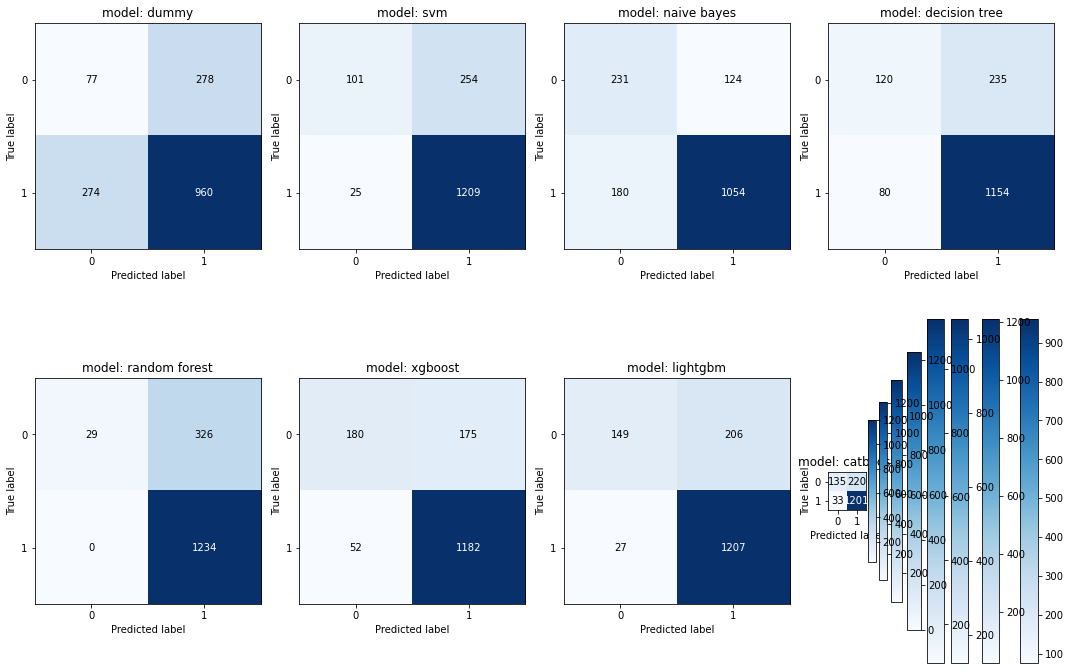

In [95]:
# Podejście z klasycznym Bag-of-words z użyciem CountVectorizer

# Budujemy podstawowy Tokenizer (funkcja do zliczania Tokenów w Dokumentach)

def get_tokens(sentence):
    one_ws_sent = " ".join(sentence.split())
    return [x.lower() for x in one_ws_sent.split(' ')]

le = LabelEncoder()
y = le.fit_transform(df["target"])
X = df['text']

vectorizer_kwargs = {'max_features': 150, 
                     'tokenizer': get_tokens, 
                     'stop_words': 'english'
                    }

kwargs = {'scoring': 'f1_micro', 
          'cv': 5, 
          'plot_result': False
         }

h.use_vectorizer_and_run_models(X, y, CountVectorizer, vectorizer_kwargs, kwargs)

tokens #150: ['about' 'according' 'after' 'against' 'all' 'also' 'and' 'any' 'april'
 'are' 'around' 'as' 'back' 'be' 'because' 'been' 'before' 'being' 'but'
 'by' 'can' 'care' 'cases' 'coronavirus' 'could' 'covid-19' 'data' 'do'
 'don’t' 'down' 'dr.' 'during' 'even' 'every' 'first' 'for' 'from' 'get'
 'go' 'going' 'government' 'had' 'has' 'have' 'he' 'health' 'help' 'her'
 'his' 'home' 'how' 'i' 'if' 'in' 'including' 'into' 'is' 'its' 'it’s'
 'just' 'know' 'last' 'like' 'make' 'many' 'may' 'medical' 'million'
 'more' 'most' 'much' 'my' 'need' 'new' 'no' 'not' 'now' 'number' 'of'
 'one' 'only' 'or' 'other' 'our' 'out' 'over' 'pandemic' 'patients'
 'people' 'president' 'public' 'said' 'said.' 'says' 'see' 'she' 'should'
 'since' 'so' 'social' 'some' 'state' 'states' 'still' 'such' 'take'
 'testing' 'than' 'that' 'their' 'them' 'there' 'these' 'they' 'think'
 'this' 'those' 'three' 'through' 'time' 'to' 'told' 'trump' 'two' 'u.s.'
 'up' 'us' 'use' 'very' 'virus' 'was' 'way' 'we' 'were' '

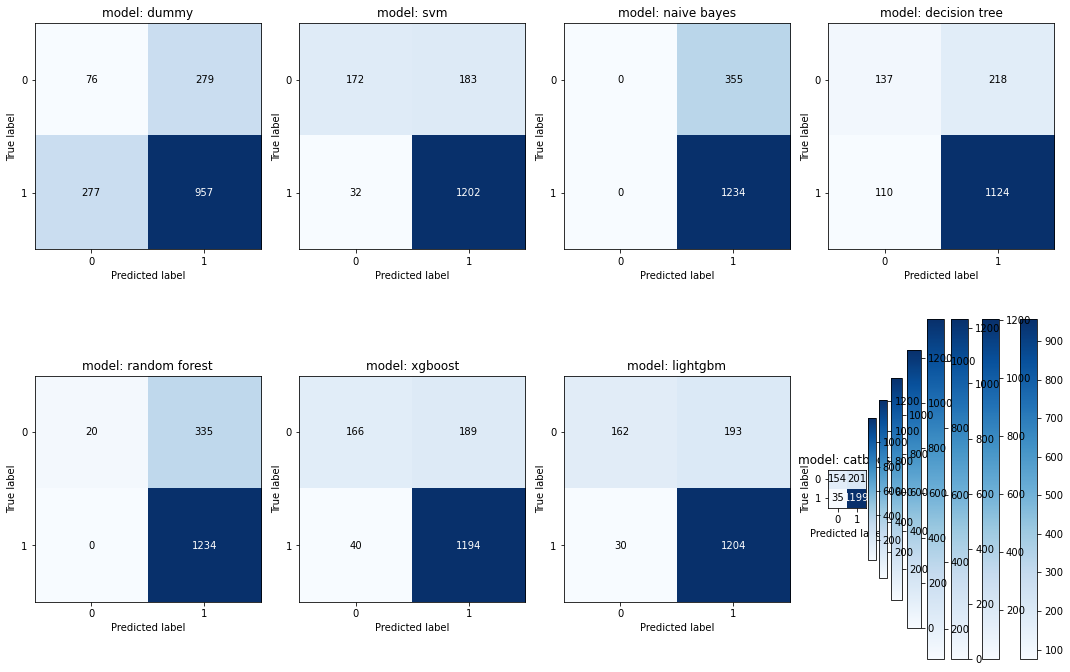

In [96]:
# Podejście z użyciem TfidfVectorizer

le = LabelEncoder()
y = le.fit_transform(df["target"])
X = df['text']

stop_words = ['the', 'an', 'a', 'at', 'on', 'it']

vectorizer_kwargs = {'max_features': 150, 
                     'tokenizer': get_tokens, 
                     'stop_words': stop_words
                    }

kwargs = {'scoring': 'f1_micro', 
          'cv': 5, 
          'plot_result': False
         }

h.use_vectorizer_and_run_models(X, y, TfidfVectorizer, vectorizer_kwargs, kwargs)

In [97]:
# Skrypty, które posłużą do przeprowadzenia dodatkowego preprocessing w celu normalizacji tokenów
# Niekoniecznie wszystkie skrypty poprawią wyniki modelu, więc trzeba potestować

import re
from html import unescape

def re_urls(text, replace_for="URL"):
    return re.sub(r'https?://\S+', replace_for, text) 

def re_user_mentioned(text, replace_for=r'\1'):
    #replace_for='--AT-USER--'
    #return re.sub(r'\S+', replace_for, text)
    return re.sub(r'@(\S+)', replace_for, text)

def re_digits(text, replace_for='DIGIT'): 
    result = re.sub(r'\d+', replace_for, text) 
    return result

def re_multi_spaces_into_one(text, replace_for=' '):
    return re.sub(r'\s+', replace_for, text)

def re_topic(text, replace_for=r'\1'):
    return re.sub(r'#(\S+)', replace_for, text)
    
def make_unescape(text):
    return unescape(text)

def re_alias(text, replace_for=r'\1'):
    return re.sub(r'@(\S+)', replace_for, text)

def re_clean_dirty_data(doc):
    doc = doc.replace("<br />", "")
    doc = doc.replace("DIGIT%", "DIGIT")
    doc = doc.replace("DIGIT.DIGIT", "DIGIT")  
    doc = doc.replace("DIGIT,DIGIT", "DIGIT")
    doc = doc.replace("$DIGIT", "DIGIT")
    doc = doc.replace("DIGIT-DIGIT", "DIGIT")
    return doc

def re_covid_replace(doc):
    doc = doc.replace("covid-19", "covid")
    doc = doc.replace("COVID-19", "covid")
    doc = doc.replace("Covid-19", "covid")
    return doc
    
def name_recog(doc):
    spcy = nlp(doc)
    replaceable = [(X.text, X.label_) for X in spcy.ents]
    for item in replaceable:
        doc = doc.replace(item[0], item[1])
    return doc

def preprocessing(doc):
    doc = make_unescape(doc)
    doc = re_covid_replace(doc)
    doc = re_urls(doc)
    doc = re_user_mentioned(doc)
    doc = re_digits(doc)
    doc = re_multi_spaces_into_one(doc)
    doc = re_topic(doc)
    doc = re_alias(doc)
    doc = re_clean_dirty_data(doc)
    doc = name_recog(doc)
    
    return doc

C:\Users\konra\miniconda3\envs\mgr\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['be'] not in stop_words.
  warnings.warn(


tokens #100: ['I' 'about' 'after' 'all' 'also' 'as' 'be' 'because' 'business' 'but'
 'by' 'can' 'case' 'come' 'company' 'coronavirus' 'could' 'covid' 'day'
 'do' 'even' 'first' 'for' 'from' 'get' 'go' 'have' 'he' 'health' 'help'
 'her' 'his' 'home' 'how' 'if' 'in' 'include' 'into' 'it' 'its' 'just'
 'know' 'like' 'make' 'many' 'may' 'more' 'most' 'my' 'need' 'new' 'no'
 'not' 'now' 'one' 'or' 'other' 'our' 'out' 'over' 'pandemic' 'patient'
 'people' 'public' 'report' 'say' 'see' 'she' 'so' 'some' 'state' 'take'
 'test' 'than' 'that' 'their' 'there' 'they' 'this' 'those' 'time' 'trump'
 'two' 'up' 'use' 'virus' 'we' 'week' 'well' 'what' 'when' 'which' 'who'
 'will' 'with' 'work' 'would' 'year' 'you' 'your']
model=dummy, f1_micro: mean=0.65, std=0.01
model=svm, f1_micro: mean=0.85, std=0.01
model=naive bayes, f1_micro: mean=0.78, std=0.0
model=decision tree, f1_micro: mean=0.76, std=0.02
model=random forest, f1_micro: mean=0.79, std=0.0
model=xgboost, f1_micro: mean=0.84, std=0.01
model=

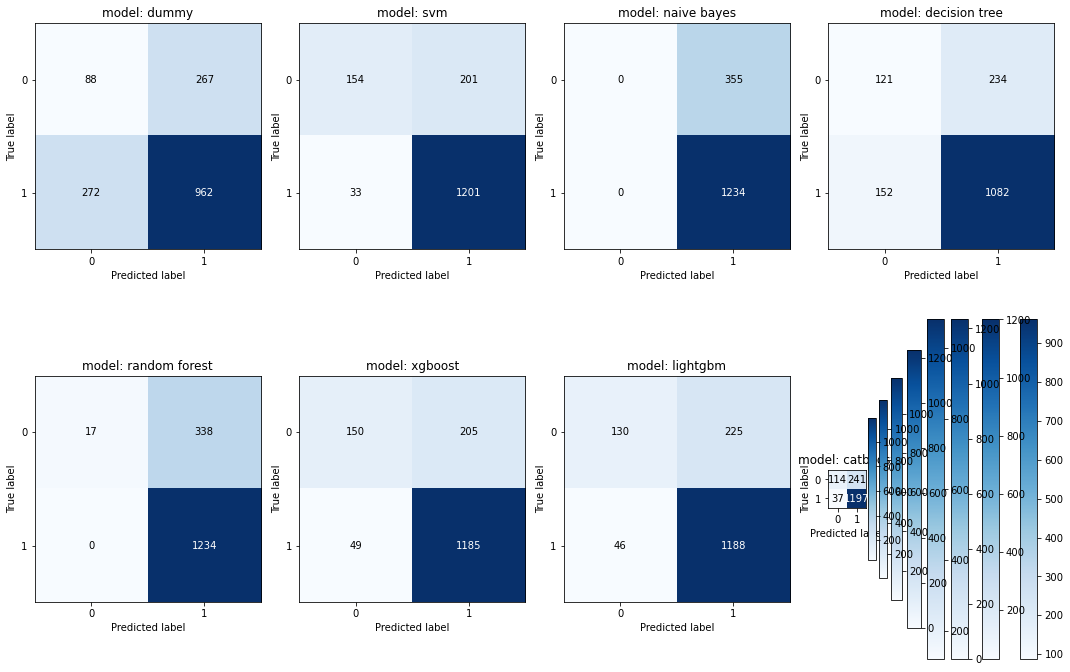

In [98]:
# Korzystamy z tokenizera dostarczonego w pakiecie Spacy
# 

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def my_tokenizer(doc):
    return [token.lemma_ for token in nlp(doc) if not token.is_punct and token.lemma_ != "-PRON-"]

#def my_tokenizer(doc):
#    return [token.lemma_ for token in nlp(doc) if not token.is_punct and token.pos_ != "-PRON-"]

extented_stop_words = text.ENGLISH_STOP_WORDS.union(["'d", "'s", '’', '’re', '’s'])

le = LabelEncoder()
y = le.fit_transform(df["target"])
X = df['text'].map(preprocessing).values

stop_words = ['the', 'to', 'and', 'of', 'a', 'an', 'at', 'on', "'s", '’', '’re', '’s', 'digit']

vectorizer_kwargs = {'max_features': 100, 
                     'tokenizer': my_tokenizer, 
                     'stop_words': stop_words,
                     #'ngram_range': (1,2),
                     #'min_df': 0.05, 
                     #'max_df': 0.95, 
                    }

kwargs = {'scoring': 'f1_micro', 
          'cv': 3, 
          'plot_result': False
         }

h.use_vectorizer_and_run_models(X, y, TfidfVectorizer, vectorizer_kwargs, kwargs)